### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
keywords_df = pd.read_csv('keywords.csv')
metadata = pd.read_csv('movies_metadata.csv')
ratings_df = pd.read_csv('ratings_small.csv')
links = pd.read_csv('links.csv')


E:\programs\anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print("Shape of keywords df:", keywords_df.shape)
print("Shape of ratings df:", ratings_df.shape)
print("Shape of links df:", links.shape)
print("Shape of metadata df:", metadata.shape)


Shape of keywords df: (46419, 2)
Shape of ratings df: (100004, 4)
Shape of links df: (45843, 3)
Shape of metadata df: (45466, 24)


In [3]:
keywords_df.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [4]:
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [6]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


### EDA

In [4]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [52]:
metadata.original_language


0        en
1        en
2        en
3        en
4        en
         ..
45461    fa
45462    tl
45463    en
45464    en
45465    en
Name: original_language, Length: 45466, dtype: object

#### Combining the necessary and important features 

Defining a function to extract the imdb id from the *imdb_id* in metadata dataframe

In [34]:
def getId(str):
    while len(str)>3:
        return int(str[3:])

In [58]:
import ast
df = pd.merge(links, ratings_df, on='movieId')
# selecting the features from metadata df
md = metadata[['genres', 'imdb_id', 'original_title',
               'popularity', 'production_countries', 'release_date', 'original_language', 'spoken_languages','vote_average', 'vote_count', 'revenue', 'budget']]
# renaming the imdb id column for merdging
md = md.rename(columns={'imdb_id':'imdbId'})
# object to str conversion
md['imdbId'] = md['imdbId'].astype(str)
# extracting the imdb ids
md['imdbId'] = md['imdbId'].apply(getId)
df2 = pd.merge(df, md, on='imdbId')
# clean and extract the genres
df2['genres'] = df2['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])
df2['spoken_languages'] = df2['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])
df2['production_countries'] = df2['production_countries'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])
df2['release_year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df2['release_year'] = df2['release_year'].astype('int')
df2['vote_count'] = df2['vote_count'].astype('int')
df2['vote_average'] = df2['vote_average'].astype('int')
df2['original_language'] = df2['original_language'].astype('str')
df2['revenue'] = df2['revenue'].astype('int')
df2['budget'] = df2['budget'].astype('int')

df2 = df2.drop(['release_date'], axis=1)
df2.head()


,movieId,imdbId,tmdbId,userId,rating,timestamp,genres,original_title,popularity,production_countries,original_language,spoken_languages,vote_average,vote_count,revenue,budget,release_year
0,1,114709,862.0,7,3.0,851866703,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
1,1,114709,862.0,9,4.0,938629179,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
2,1,114709,862.0,13,5.0,1331380058,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
3,1,114709,862.0,15,2.0,997938310,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
4,1,114709,862.0,19,3.0,855190091,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995


#### Highest rated movies by genre and year

Function to return the ratings of the movies that takes genre and year as input.

In [36]:
def getRatings(genre, year, topCount):
    temp = df2[(df2.release_year >= year) & (df2.genres.apply(lambda x: genre in x)) & (df2.revenue > df2.revenue.quantile(0.85))]
    rating = temp.groupby('original_title')['rating'].mean().sort_values(ascending=False)
    return rating[:topCount]


In [37]:
getRatings('Action', 2010, 10)

original_title
The Avengers                          4.010870
Warcraft                              4.000000
Ant-Man                               3.794118
Life of Pi                            3.772727
Captain America: The First Avenger    3.659091
The Hobbit: An Unexpected Journey     3.520000
Jurassic World                        3.444444
Thor                                  3.357143
The Amazing Spider-Man                3.325000
Man of Steel                          2.954545
Name: rating, dtype: float64

**Barplot** of the top rated movies

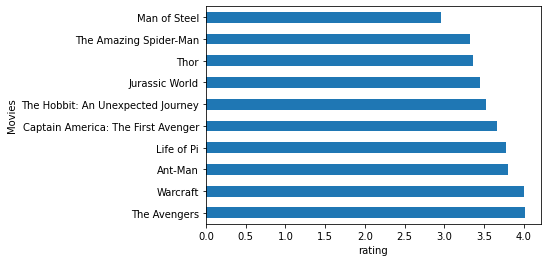

In [38]:
plt.figure()
getRatings('Action', 2010, 10).plot.barh()
plt.xlabel('rating')
plt.ylabel('Movies')
plt.show()


#### Vote Count by language

In [42]:
def getVotesByLanguage(year,topCount):
    temp = df2[(df2.release_year >= year)]
    rating = temp.groupby('original_language')[
        'vote_count'].count().sort_values(ascending=False)
    return rating[:topCount]


**Barplot** vote count by language

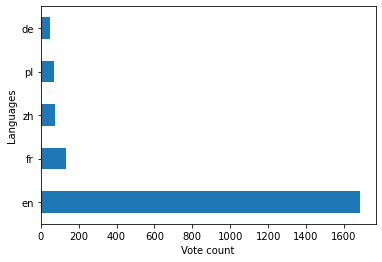

In [101]:
plt.figure()
getVotesByLanguage(2010, 5).plot.barh()
plt.xlabel('Vote count')
plt.ylabel('Languages')
plt.show()


- English has the highest number of vote counts
- Followed by French

#### Movie Profit

Funtion to find the profit of the movies based on their genre and release year

In [95]:
def getProfitByLanguage(year, genre):
    # considering only those whose budget is more than 0
    temp = df2[(df2.release_year >= year) & (df2.budget > 0)& (df2.genres.apply(lambda x : genre in x))][['budget','revenue','original_title']]
    temp['profit'] = temp['revenue'] - temp['budget']
    temp['profit'] = (temp['profit']/temp['budget'])*100
    return temp.groupby('original_title')['profit'].mean().sort_values(ascending=False)


In [96]:
getProfitByLanguage(2010, 'Animation')

original_title
Toy Story 3                 433.484852
Gnomeo & Juliet             426.978978
The Smurfs                  412.499385
Shrek Forever After         356.121738
The Croods                  333.465873
Hotel Transylvania          321.618356
How to Train Your Dragon    199.926521
The Adventures of Tintin    186.107747
Epic                        168.426634
Tangled                     127.613437
Mr. Peabody & Sherman        88.215469
The Boxtrolls                80.426283
L'illusionniste             -68.875383
Name: profit, dtype: float64

**Barplot** of profit of the movies filtered by *genre* and *year*

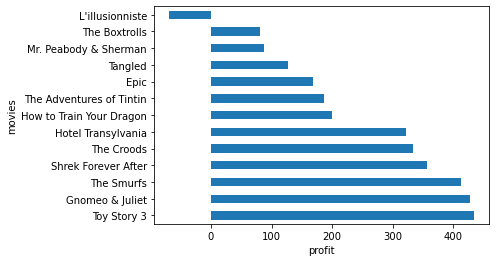

In [98]:
plt.figure()
getProfitByLanguage(2010, 'Animation').plot.barh()
plt.xlabel('profit')
plt.ylabel('movies')
plt.show()

- **Toy Story 3** has the highest profit value in the animation genre

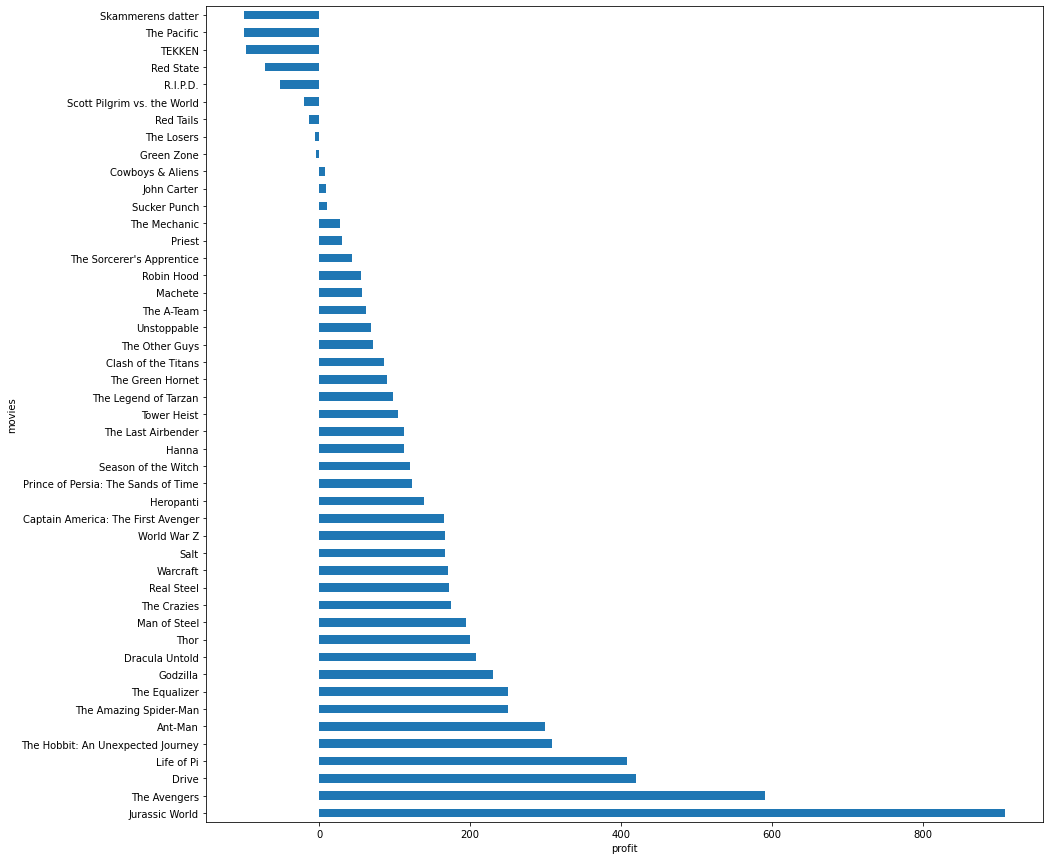

In [100]:
plt.figure(figsize=(15, 15))
getProfitByLanguage(2010, 'Action').plot.barh()
plt.xlabel('profit')
plt.ylabel('movies')
plt.show()


- **Jurassic World** and **The Avengers** are the top profit maker in action category.

### Data Preprocessing

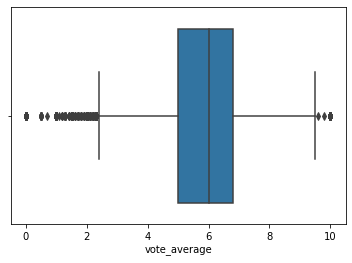

In [17]:
# Checking the spread of the average vote column using Boxplot
plt.figure()
sns.boxplot(x = metadata['vote_average'])
plt.show()

In [18]:
# Taking the vote counts and avg no of votes
vote_counts = metadata[metadata['vote_count'].notnull()]['vote_count'].astype('int')

vote_averages = metadata[metadata['vote_average'].notnull()]['vote_average'].astype('int')

avg_vote = vote_averages.median()

# considering 95th percentile cutoff for the vote counts
counts = vote_counts.quantile(0.95)
print('The average count of the number of votes: ',avg_vote)
print('The cutoff vote counts: ',counts)


The average count of the number of votes:  6.0
The cutoff vote counts:  434.0


In [22]:
# Treating the release data column and obtaining the year
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

metadata['year'][0:3]

0    1995
1    1995
2    1995
Name: year, dtype: object

In [23]:
# final data for processing
data = metadata[(metadata['vote_count'] >= counts) &
               (metadata['vote_count'].notnull()) &
               (metadata['vote_average'].notnull())][['title',
                                                'year',
                                                'vote_count',
                                                'vote_average',
                                                'popularity',
                                                'genres']]
                                                
# converting the vote_count and avg_vote column to int data type
data['vote_count'] = data['vote_count'].astype('int')
data['vote_average'] = data['vote_average'].astype('int')
data.shape


(2274, 6)

In [24]:
# function to calculate the rating metric (weighted rating) 
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+counts) * R) + (counts/(counts+v) * avg_vote)


In [25]:
data['wr'] = data.apply(weighted_rating, axis=1)

### Movie prediction

In [35]:
# Sorting the movies based on the weighted rating value
top_movies = data.sort_values('wr', ascending=False)
top_movies.head(10)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",7.940175
12481,The Dark Knight,2008,12269,8,123.167259,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",7.931670
22879,Interstellar,2014,11187,8,32.213481,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",7.925308
2843,Fight Club,1999,9678,8,63.869599,"[{'id': 18, 'name': 'Drama'}]",7.914161
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.906927
292,Pulp Fiction,1994,8670,8,140.950236,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",7.904657
314,The Shawshank Redemption,1994,8358,8,51.645403,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.901274
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.899769
351,Forrest Gump,1994,8147,8,48.307194,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",7.898846
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.892508


This shows, that **inception**, **The Dark Knight** and **Intersteller** are the top most popular movies of all time.

### Movie prediction - considering the genre

In [36]:
# cleaning the genres column
import ast
genres_clean = []
cnt = 1
for val in top_movies['genres']:
    i = 1
    res = ast.literal_eval(val)
    str = ""
    for l in res:
        str = str + l["name"] + " "
        i = i + 1
    genres_clean.append(str)
top_movies["genres"] = genres_clean
top_movies.head(2)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,Action Thriller Science Fiction Mystery Advent...,7.940175
12481,The Dark Knight,2008,12269,8,123.167259,Drama Action Crime Thriller,7.931670


In [41]:
# extracting the genres from the given feature in the metadata_movie_dataset
metadata['genres'] = metadata['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])

metadata['genres'][0:2]


0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
Name: genres, dtype: object

In [42]:
# segmenting the movies based on the genres
s = metadata.apply(lambda x: pd.Series(x['genres']),
             axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_metadata = metadata.drop('genres', axis=1).join(s)
gen_metadata.head(3).transpose()


<ipython-input-42-5dfea1b85323>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = metadata.apply(lambda x: pd.Series(x['genres']),


,0,0,0
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000,30000000,30000000
homepage,http://toystory.disney.com/toy-story,http://toystory.disney.com/toy-story,http://toystory.disney.com/toy-story
id,862,862,862
imdb_id,tt0114709,tt0114709,tt0114709
original_language,en,en,en
original_title,Toy Story,Toy Story,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
popularity,21.946943,21.946943,21.946943


In [43]:
# function to predict the top most popular movies based on particular genre
def popular_by_genre(genre, percentile=0.85):
    df = gen_metadata[gen_metadata['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & 
                   (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: 
                        (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),
                        axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

**Predictions**:

In [45]:
popular_by_genre('Action').head(15)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.955099
12481,The Dark Knight,2008,12269,8,123.167259,7.948610
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,7.929579
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,7.924031
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,7.918382
256,Star Wars,1977,6778,8,42.149697,7.908327
1154,The Empire Strikes Back,1980,5998,8,19.470959,7.896841
4135,Scarface,1983,3017,8,11.299673,7.802046
9430,Oldboy,2003,2000,8,10.616859,7.711649
1910,Seven Samurai,1954,892,8,15.01777,7.426145


### 2nd Approach